# Random Forest - Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../common-data/penguins_size.csv")
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,m
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,f
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,f
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,f
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,m


## Train and Test splits

In [3]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Random Forest Classification

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
model = RandomForestClassifier(n_estimators=10, random_state=101)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [8]:
preds = model.predict(X_test)

## Evaluation

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

In [10]:
cnf_matrix = confusion_matrix(y_test, preds)
cnf_matrix

array([[40,  1,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

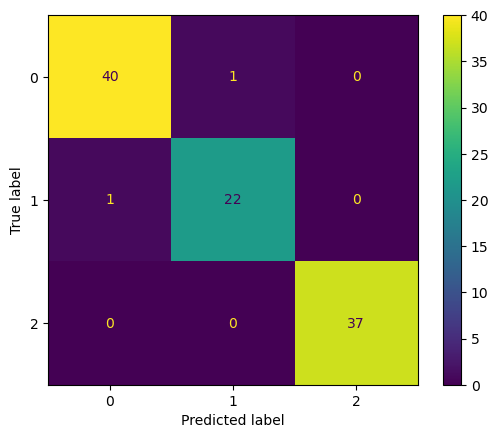

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()

In [12]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



## Feature Importance

In [13]:
model.feature_importances_

array([3.46584088e-01, 1.20150588e-01, 2.39262547e-01, 1.48533620e-01,
       1.39253740e-01, 2.10550136e-05, 6.19436222e-03])

## Choosing correct number of trees

In [14]:
test_error = []

for n in range(1, 40):
    
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds, y_test))

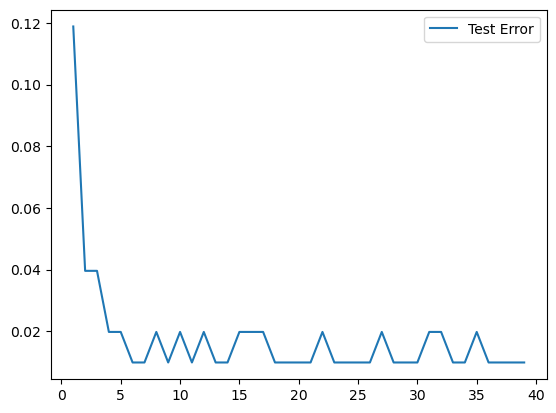

In [15]:
plt.plot(range(1, 40), test_error, label='Test Error')
plt.legend()